<a href="https://colab.research.google.com/github/asifsharan10/DDoS_Attack_Detection_With_Machine_Learning/blob/main/DDoS%20attack%20detection%20algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
batch_size = 100000

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/Syn.csv', nrows=batch_size)
data2 = pd.read_csv('/content/drive/MyDrive/UDPLag.csv', nrows=batch_size)
data3 = pd.read_csv('/content/drive/MyDrive/DrDoS_UDP.csv',nrows=batch_size)

<ipython-input-5-2f1b06f8d187>:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('/content/drive/MyDrive/Syn.csv', nrows=batch_size)
<ipython-input-5-2f1b06f8d187>:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv('/content/drive/MyDrive/UDPLag.csv', nrows=batch_size)
<ipython-input-5-2f1b06f8d187>:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data3 = pd.read_csv('/content/drive/MyDrive/DrDoS_UDP.csv',nrows=batch_size)


In [ ]:
data1

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,281052,172.16.0.5-192.168.50.1-53058-53058-6,172.16.0.5,53058,192.168.50.1,53058,6,2018-12-01 13:30:30.741451,115799309,19,...,646237.483665,1709809.0,1.0,1.426117e+07,3.220326e+06,21714933.0,11043464.0,0,1,Syn
1,450424,172.16.0.5-192.168.50.1-32237-32237-6,172.16.0.5,32237,192.168.50.1,32237,6,2018-12-01 13:30:30.741452,113973933,16,...,19.595918,49.0,1.0,1.628198e+07,2.573891e+06,20019405.0,11993631.0,0,1,Syn
2,182979,172.16.0.5-192.168.50.1-60495-9840-6,172.16.0.5,60495,192.168.50.1,9840,6,2018-12-01 13:30:30.741501,112,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,Syn
3,41540,172.16.0.5-192.168.50.1-59724-59724-6,172.16.0.5,59724,192.168.50.1,59724,6,2018-12-01 13:30:30.741563,105985004,16,...,17.705259,48.0,1.0,1.514071e+07,3.077366e+06,20954123.0,11120336.0,0,1,Syn
4,358711,172.16.0.5-192.168.50.1-60496-32538-6,172.16.0.5,60496,192.168.50.1,32538,6,2018-12-01 13:30:30.741565,1,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,504723,172.16.0.5-192.168.50.1-61621-23442-6,172.16.0.5,61621,192.168.50.1,23442,6,2018-12-01 13:30:41.048355,1,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,Syn
99996,189465,172.16.0.5-192.168.50.1-23225-23225-6,172.16.0.5,23225,192.168.50.1,23225,6,2018-12-01 13:30:41.048486,98328855,12,...,20.911719,48.0,1.0,1.966576e+07,9.632134e+06,36505237.0,12899186.0,0,1,Syn
99997,743547,172.16.0.5-192.168.50.1-61585-61585-6,172.16.0.5,61585,192.168.50.1,61585,6,2018-12-01 13:30:41.049229,89954951,14,...,37.565942,85.0,1.0,1.499248e+07,3.421340e+06,19545882.0,11650474.0,0,1,Syn
99998,60457,172.16.0.5-192.168.50.1-61622-52262-6,172.16.0.5,61622,192.168.50.1,52262,6,2018-12-01 13:30:41.049231,1,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,Syn


In [ ]:
data2

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,186059,172.16.0.5-192.168.50.1-58445-4463-17,172.16.0.5,58445,192.168.50.1,4463,17,2018-12-01 13:04:45.928673,1,2,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,UDP-lag
1,135692,172.16.0.5-192.168.50.1-36908-9914-17,172.16.0.5,36908,192.168.50.1,9914,17,2018-12-01 13:04:45.928913,1,2,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,UDP-lag
2,33822,172.16.0.5-192.168.50.1-41727-32361-17,172.16.0.5,41727,192.168.50.1,32361,17,2018-12-01 13:04:45.928915,2,2,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,UDP-lag
3,24498,172.16.0.5-192.168.50.1-55447-5691-17,172.16.0.5,55447,192.168.50.1,5691,17,2018-12-01 13:04:45.929024,2,2,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,UDP-lag
4,117372,172.16.0.5-192.168.50.1-58794-56335-17,172.16.0.5,58794,192.168.50.1,56335,17,2018-12-01 13:04:45.929096,1,2,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,UDP-lag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,49113,172.16.0.5-192.168.50.1-5838-5838-6,172.16.0.5,5838,192.168.50.1,5838,6,2018-12-01 13:29:48.327410,27493436,4,...,0.000000,1.0,1.0,27493434.0,0.000000e+00,27493434.0,27493434.0,0,1,UDP-lag
99996,215934,172.16.0.5-192.168.50.1-30092-1933-6,172.16.0.5,30092,192.168.50.1,1933,6,2018-12-01 13:29:48.327411,49,2,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,UDP-lag
99997,106929,172.16.0.5-192.168.50.1-42092-42092-6,172.16.0.5,42092,192.168.50.1,42092,6,2018-12-01 13:29:48.327460,26907958,6,...,57.982756,83.0,1.0,13453918.5,4.202243e+06,16425353.0,10482484.0,0,1,UDP-lag
99998,131754,172.16.0.5-192.168.50.1-30093-25747-6,172.16.0.5,30093,192.168.50.1,25747,6,2018-12-01 13:29:48.327519,58,2,...,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,1,UDP-lag


In [ ]:
data3

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,101418,172.16.0.5-192.168.50.1-43443-6652-17,172.16.0.5,43443,192.168.50.1,6652,17,2018-12-01 12:36:57.628026,218395,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP
1,21564,172.16.0.5-192.168.50.1-54741-9712-17,172.16.0.5,54741,192.168.50.1,9712,17,2018-12-01 12:36:57.628076,108219,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP
2,23389,172.16.0.5-192.168.50.1-56589-4680-17,172.16.0.5,56589,192.168.50.1,4680,17,2018-12-01 12:36:57.628164,104579,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP
3,48872,172.16.0.5-192.168.50.1-40233-2644-17,172.16.0.5,40233,192.168.50.1,2644,17,2018-12-01 12:36:57.628166,110967,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP
4,80354,172.16.0.5-192.168.50.1-33989-16901-17,172.16.0.5,33989,192.168.50.1,16901,17,2018-12-01 12:36:57.628217,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,109764,172.16.0.5-192.168.50.1-56896-39819-17,172.16.0.5,56896,192.168.50.1,39819,17,2018-12-01 12:55:02.845935,105861,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP
99996,102401,172.16.0.5-192.168.50.1-49913-58347-17,172.16.0.5,49913,192.168.50.1,58347,17,2018-12-01 12:55:02.846440,108898,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP
99997,80935,172.16.0.5-192.168.50.1-33616-65124-17,172.16.0.5,33616,192.168.50.1,65124,17,2018-12-01 12:55:02.847301,213279,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP
99998,17488,172.16.0.5-192.168.50.1-34130-43279-17,172.16.0.5,34130,192.168.50.1,43279,17,2018-12-01 12:55:02.847408,214440,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_UDP


In [ ]:
data = pd.concat([data1,data2,data3],ignore_index = True)

In [ ]:
data

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,281052,172.16.0.5-192.168.50.1-53058-53058-6,172.16.0.5,53058,192.168.50.1,53058,6,2018-12-01 13:30:30.741451,115799309,19,...,646237.483665,1709809.0,1.0,1.426117e+07,3.220326e+06,21714933.0,11043464.0,0,1,Syn
1,450424,172.16.0.5-192.168.50.1-32237-32237-6,172.16.0.5,32237,192.168.50.1,32237,6,2018-12-01 13:30:30.741452,113973933,16,...,19.595918,49.0,1.0,1.628198e+07,2.573891e+06,20019405.0,11993631.0,0,1,Syn
2,182979,172.16.0.5-192.168.50.1-60495-9840-6,172.16.0.5,60495,192.168.50.1,9840,6,2018-12-01 13:30:30.741501,112,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,Syn
3,41540,172.16.0.5-192.168.50.1-59724-59724-6,172.16.0.5,59724,192.168.50.1,59724,6,2018-12-01 13:30:30.741563,105985004,16,...,17.705259,48.0,1.0,1.514071e+07,3.077366e+06,20954123.0,11120336.0,0,1,Syn
4,358711,172.16.0.5-192.168.50.1-60496-32538-6,172.16.0.5,60496,192.168.50.1,32538,6,2018-12-01 13:30:30.741565,1,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,109764,172.16.0.5-192.168.50.1-56896-39819-17,172.16.0.5,56896,192.168.50.1,39819,17,2018-12-01 12:55:02.845935,105861,4,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,DrDoS_UDP
299996,102401,172.16.0.5-192.168.50.1-49913-58347-17,172.16.0.5,49913,192.168.50.1,58347,17,2018-12-01 12:55:02.846440,108898,4,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,DrDoS_UDP
299997,80935,172.16.0.5-192.168.50.1-33616-65124-17,172.16.0.5,33616,192.168.50.1,65124,17,2018-12-01 12:55:02.847301,213279,6,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,DrDoS_UDP
299998,17488,172.16.0.5-192.168.50.1-34130-43279-17,172.16.0.5,34130,192.168.50.1,43279,17,2018-12-01 12:55:02.847408,214440,6,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,DrDoS_UDP


In [ ]:
import numpy as np

In [ ]:
data_real = data.replace(np.inf, np.nan)

In [ ]:
data_real.isnull().sum().sum()

24020

In [ ]:
data_df = data_real.dropna(axis=0)


In [ ]:
data_df.isnull().sum().sum()

0

In [ ]:
data_df

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,281052,172.16.0.5-192.168.50.1-53058-53058-6,172.16.0.5,53058,192.168.50.1,53058,6,2018-12-01 13:30:30.741451,115799309,19,...,646237.483665,1709809.0,1.0,1.426117e+07,3.220326e+06,21714933.0,11043464.0,0,1,Syn
1,450424,172.16.0.5-192.168.50.1-32237-32237-6,172.16.0.5,32237,192.168.50.1,32237,6,2018-12-01 13:30:30.741452,113973933,16,...,19.595918,49.0,1.0,1.628198e+07,2.573891e+06,20019405.0,11993631.0,0,1,Syn
2,182979,172.16.0.5-192.168.50.1-60495-9840-6,172.16.0.5,60495,192.168.50.1,9840,6,2018-12-01 13:30:30.741501,112,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,Syn
3,41540,172.16.0.5-192.168.50.1-59724-59724-6,172.16.0.5,59724,192.168.50.1,59724,6,2018-12-01 13:30:30.741563,105985004,16,...,17.705259,48.0,1.0,1.514071e+07,3.077366e+06,20954123.0,11120336.0,0,1,Syn
4,358711,172.16.0.5-192.168.50.1-60496-32538-6,172.16.0.5,60496,192.168.50.1,32538,6,2018-12-01 13:30:30.741565,1,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,109764,172.16.0.5-192.168.50.1-56896-39819-17,172.16.0.5,56896,192.168.50.1,39819,17,2018-12-01 12:55:02.845935,105861,4,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,DrDoS_UDP
299996,102401,172.16.0.5-192.168.50.1-49913-58347-17,172.16.0.5,49913,192.168.50.1,58347,17,2018-12-01 12:55:02.846440,108898,4,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,DrDoS_UDP
299997,80935,172.16.0.5-192.168.50.1-33616-65124-17,172.16.0.5,33616,192.168.50.1,65124,17,2018-12-01 12:55:02.847301,213279,6,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,DrDoS_UDP
299998,17488,172.16.0.5-192.168.50.1-34130-43279-17,172.16.0.5,34130,192.168.50.1,43279,17,2018-12-01 12:55:02.847408,214440,6,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,DrDoS_UDP


In [ ]:
data_df.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [ ]:
data_X = data_df.drop([' Label', 'SimillarHTTP',' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std','Unnamed: 0'], axis = 1)

In [ ]:
data_X.shape

(287990, 80)

In [ ]:
data_y = data_df[' Label']

In [ ]:
data_y.shape

(287990,)

In [ ]:
data_df.isnull().sum().sum()

0

In [ ]:
data_y.unique()

array(['Syn', 'BENIGN', 'UDP-lag', 'WebDDoS', 'DrDoS_UDP'], dtype=object)

In [ ]:
data_y

0               Syn
1               Syn
2               Syn
3               Syn
4               Syn
            ...    
299995    DrDoS_UDP
299996    DrDoS_UDP
299997    DrDoS_UDP
299998    DrDoS_UDP
299999    DrDoS_UDP
Name:  Label, Length: 287990, dtype: object

In [ ]:
data_X

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,172.16.0.5-192.168.50.1-53058-53058-6,172.16.0.5,53058,192.168.50.1,53058,6,2018-12-01 13:30:30.741451,115799309,19,2,...,20,244280.142857,646237.483665,1709809.0,1.0,1.426117e+07,3.220326e+06,21714933.0,11043464.0,1
1,172.16.0.5-192.168.50.1-32237-32237-6,172.16.0.5,32237,192.168.50.1,32237,6,2018-12-01 13:30:30.741452,113973933,16,0,...,20,9.000000,19.595918,49.0,1.0,1.628198e+07,2.573891e+06,20019405.0,11993631.0,1
2,172.16.0.5-192.168.50.1-60495-9840-6,172.16.0.5,60495,192.168.50.1,9840,6,2018-12-01 13:30:30.741501,112,2,2,...,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
3,172.16.0.5-192.168.50.1-59724-59724-6,172.16.0.5,59724,192.168.50.1,59724,6,2018-12-01 13:30:30.741563,105985004,16,0,...,20,7.857143,17.705259,48.0,1.0,1.514071e+07,3.077366e+06,20954123.0,11120336.0,1
4,172.16.0.5-192.168.50.1-60496-32538-6,172.16.0.5,60496,192.168.50.1,32538,6,2018-12-01 13:30:30.741565,1,2,0,...,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,172.16.0.5-192.168.50.1-56896-39819-17,172.16.0.5,56896,192.168.50.1,39819,17,2018-12-01 12:55:02.845935,105861,4,0,...,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
299996,172.16.0.5-192.168.50.1-49913-58347-17,172.16.0.5,49913,192.168.50.1,58347,17,2018-12-01 12:55:02.846440,108898,4,0,...,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
299997,172.16.0.5-192.168.50.1-33616-65124-17,172.16.0.5,33616,192.168.50.1,65124,17,2018-12-01 12:55:02.847301,213279,6,0,...,14,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
299998,172.16.0.5-192.168.50.1-34130-43279-17,172.16.0.5,34130,192.168.50.1,43279,17,2018-12-01 12:55:02.847408,214440,6,0,...,14,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1


Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
data_y_trans = le.fit_transform(data_y)

In [ ]:
data_y_trans

array([2, 2, 2, ..., 1, 1, 1])

In [ ]:
le_fid = LabelEncoder()

In [ ]:
le_fid.fit(data_X['Flow ID'])
data_X['Flow ID'] = le_fid.fit_transform(data_X['Flow ID'])

In [ ]:
le_SIP = LabelEncoder()

In [ ]:
le_SIP.fit(data_X[' Source IP'])
data_X[' Source IP'] = le_SIP.fit_transform(data_X[' Source IP'])

In [ ]:
le_DIP = LabelEncoder()

In [ ]:
le_DIP.fit(data_X[' Destination IP'])
data_X[' Destination IP'] = le_DIP.fit_transform(data_X[' Destination IP'])

In [ ]:
le_timestamp = LabelEncoder()
le_timestamp.fit(data_X[' Timestamp'])
data_X[' Timestamp'] = le_timestamp.fit_transform(data_X[' Timestamp'])

In [ ]:
data_X

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,185072,6,53058,68,53058,6,196378,115799309,19,2,...,20,244280.142857,646237.483665,1709809.0,1.0,1.426117e+07,3.220326e+06,21714933.0,11043464.0,1
1,51862,6,32237,68,32237,6,196379,113973933,16,0,...,20,9.000000,19.595918,49.0,1.0,1.628198e+07,2.573891e+06,20019405.0,11993631.0,1
2,235917,6,60495,68,9840,6,196380,112,2,2,...,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
3,231246,6,59724,68,59724,6,196381,105985004,16,0,...,20,7.857143,17.705259,48.0,1.0,1.514071e+07,3.077366e+06,20954123.0,11120336.0,1
4,235918,6,60496,68,32538,6,196382,1,2,0,...,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,211731,6,56896,68,39819,17,98786,105861,4,0,...,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
299996,165375,6,49913,68,58347,17,98787,108898,4,0,...,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
299997,57695,6,33616,68,65124,17,98788,213279,6,0,...,14,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
299998,60766,6,34130,68,43279,17,98789,214440,6,0,...,14,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1


In [ ]:
data_X.dtypes

Flow ID                int64
 Source IP             int64
 Source Port           int64
 Destination IP        int64
 Destination Port      int64
                      ...   
Idle Mean            float64
 Idle Std            float64
 Idle Max            float64
 Idle Min            float64
 Inbound               int64
Length: 80, dtype: object

In [ ]:
data_X

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,185072,6,53058,68,53058,6,196378,115799309,19,2,...,20,244280.142857,646237.483665,1709809.0,1.0,1.426117e+07,3.220326e+06,21714933.0,11043464.0,1
1,51862,6,32237,68,32237,6,196379,113973933,16,0,...,20,9.000000,19.595918,49.0,1.0,1.628198e+07,2.573891e+06,20019405.0,11993631.0,1
2,235917,6,60495,68,9840,6,196380,112,2,2,...,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
3,231246,6,59724,68,59724,6,196381,105985004,16,0,...,20,7.857143,17.705259,48.0,1.0,1.514071e+07,3.077366e+06,20954123.0,11120336.0,1
4,235918,6,60496,68,32538,6,196382,1,2,0,...,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,211731,6,56896,68,39819,17,98786,105861,4,0,...,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
299996,165375,6,49913,68,58347,17,98787,108898,4,0,...,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
299997,57695,6,33616,68,65124,17,98788,213279,6,0,...,14,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1
299998,60766,6,34130,68,43279,17,98789,214440,6,0,...,14,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,1


In [ ]:
data_y.values

array(['Syn', 'Syn', 'Syn', ..., 'DrDoS_UDP', 'DrDoS_UDP', 'DrDoS_UDP'],
      dtype=object)

In [ ]:

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()

Train-Test before featuring

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y_trans, test_size = 0.40, random_state = 42)

In [ ]:
X_train.shape

(172794, 80)

In [ ]:
X_test.shape

(115196, 80)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

Feature Selection(Chi2)

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier

#selecting 20 best features
# select_best= SelectKBest(chi2, k=20)
# X_feat_20 = select_best.fit_transform(data_X, data_y_trans)
# X_feat_20.shape

model = ExtraTreesClassifier(random_state=42)
model.fit(data_X, data_y_trans)

ExtraTreesClassifier(random_state=42)

In [ ]:
model.feature_importances_

array([2.65792912e-02, 4.51484114e-03, 2.19500027e-02, 3.39013328e-03,
       5.22633755e-03, 2.73658714e-02, 3.95880642e-01, 4.15670821e-02,
       1.46057306e-02, 1.02177553e-03, 3.15902940e-03, 1.28026004e-04,
       7.52355785e-03, 3.23124155e-02, 1.80142228e-02, 4.62100784e-03,
       9.04580833e-03, 1.05948257e-02, 6.67779987e-03, 7.24072723e-03,
       1.60413927e-03, 4.53795036e-02, 6.54119903e-03, 3.98144270e-03,
       9.67517879e-03, 1.45164615e-03, 1.24461707e-03, 7.29051629e-04,
       6.62104780e-04, 1.10330263e-03, 2.11431309e-04, 4.14532279e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.44282769e-02,
       9.51994846e-04, 1.00869287e-02, 9.93630799e-04, 2.05564390e-02,
       8.78441399e-03, 1.53969594e-02, 7.35002206e-04, 4.85730353e-04,
       0.00000000e+00, 1.22259028e-04, 3.92099411e-04, 0.00000000e+00,
       7.14027244e-02, 2.42861542e-03, 1.18101097e-03, 0.00000000e+00,
       1.63330961e-03, 1.82014313e-02, 1.21762190e-02, 9.77992629e-04,
      

<Axes: title={'center': 'Standardised Dataset Feature Selection using ExtraTreesClassifier'}>

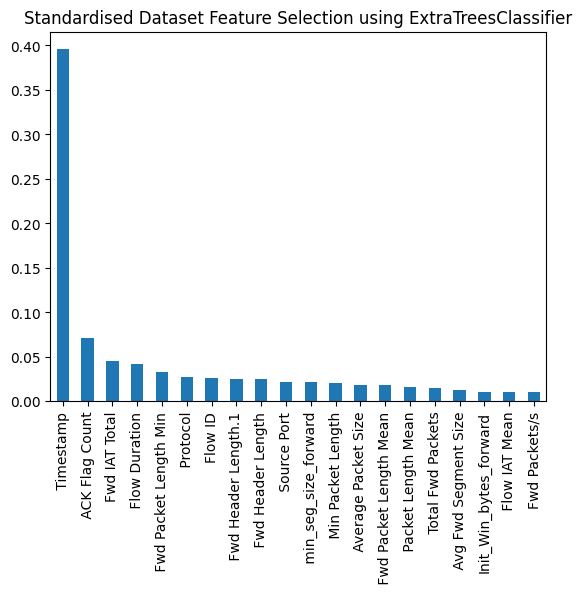

In [ ]:
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

In [ ]:
data_X.shape

(287990, 80)

In [ ]:
# Create a pandas series with feature importances and sort in descending order
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns).sort_values(ascending=False)

# Get the top 20 feature names
top_20_features = feature_importance_std[:20].index.tolist()

# Create a new dataset with only the top 20 features
data_new_20features_X = data_X[top_20_features]

In [ ]:
data_new_20features_X.columns


Index([' Timestamp', ' ACK Flag Count', 'Fwd IAT Total', ' Flow Duration',
       ' Fwd Packet Length Min', ' Protocol', 'Flow ID',
       ' Fwd Header Length.1', ' Fwd Header Length', ' Source Port',
       ' min_seg_size_forward', ' Min Packet Length', ' Average Packet Size',
       ' Fwd Packet Length Mean', ' Packet Length Mean', ' Total Fwd Packets',
       ' Avg Fwd Segment Size', 'Init_Win_bytes_forward', ' Flow IAT Mean',
       'Fwd Packets/s'],
      dtype='object')

Train-Test After Featuring 20

```
# This is formatted as code
```



In [ ]:
from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_new_20features_X, data_y_trans, test_size = 0.40, random_state = 42)

In [ ]:
X_train_20

,Timestamp,ACK Flag Count,Fwd IAT Total,Flow Duration,Fwd Packet Length Min,Protocol,Flow ID,Fwd Header Length.1,Fwd Header Length,Source Port,min_seg_size_forward,Min Packet Length,Average Packet Size,Fwd Packet Length Mean,Packet Length Mean,Total Fwd Packets,Avg Fwd Segment Size,Init_Win_bytes_forward,Flow IAT Mean,Fwd Packets/s
149185,147722,0,0.0,963,0.0,6,16395,32,32,17943,32,0.0,0.00,0.0,0.000000,1,0.0,259,1.926000e+02,1038.421599
20821,215348,1,114752552.0,114752552,0.0,6,216838,320,320,57675,20,0.0,0.00,0.0,0.000000,16,0.0,5840,6.750150e+06,0.139430
171139,169265,1,31932664.0,31932664,0.0,6,40892,120,120,27288,20,0.0,0.00,0.0,0.000000,6,0.0,5840,4.561809e+06,0.187895
265030,63995,0,343749.0,343749,0.0,6,205345,96,96,56040,32,0.0,0.00,0.0,0.000000,3,0.0,259,8.593725e+04,8.727298
292457,91312,0,984099.0,984099,321.0,17,149247,96,96,47526,0,321.0,378.15,362.1,360.142857,20,362.1,-1,5.179468e+04,20.323159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128513,127063,0,106966.0,106966,330.0,17,82622,32,32,37679,8,330.0,442.00,359.5,353.600000,4,359.5,-1,3.565533e+04,37.395060
271019,69979,0,3.0,3,1472.0,17,255297,28,28,672,14,1472.0,2208.00,1472.0,1472.000000,2,1472.0,-1,3.000000e+00,666666.666667
140572,139116,0,3.0,3,375.0,17,152542,0,0,48021,0,375.0,562.50,375.0,375.000000,2,375.0,-1,3.000000e+00,666666.666667
155549,154051,1,40208887.0,40208887,0.0,6,13844,120,120,16976,20,0.0,0.00,0.0,0.000000,6,0.0,5840,8.041777e+06,0.149221


In [ ]:
from sklearn.preprocessing import StandardScaler
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

Applying Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_std_20, y_train_20)

RandomForestClassifier()

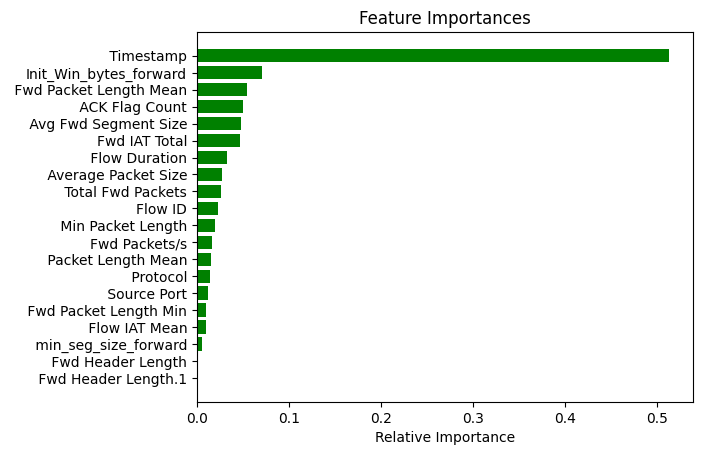

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)
features = data_new_20features_X.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
rf_y_pred = rf.predict(X_test_std_20)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
rf_conf_mat = confusion_matrix(y_test_20, rf_y_pred)
print("Random Forest Confusion: \n", rf_conf_mat)

Random Forest Confusion: 
 [[ 1792     0     1     1     0]
 [    3 39110     0   126     0]
 [    0     0 36493     0     0]
 [    1     0   158 37340     0]
 [    0     0     0   117    54]]


Text(33.22222222222222, 0.5, 'Truth')

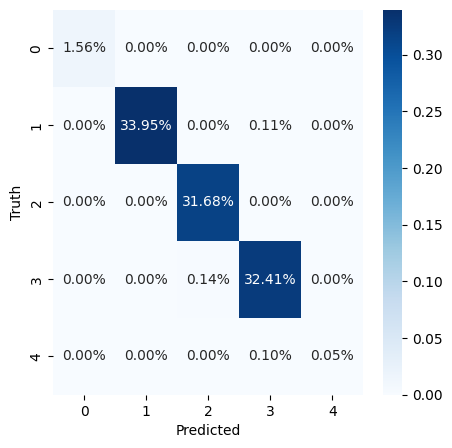

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,5))
sn.heatmap(rf_conf_mat/np.sum(rf_conf_mat), annot=True,
            fmt='.2%',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
!pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 12.0 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(data_new_20features_X)

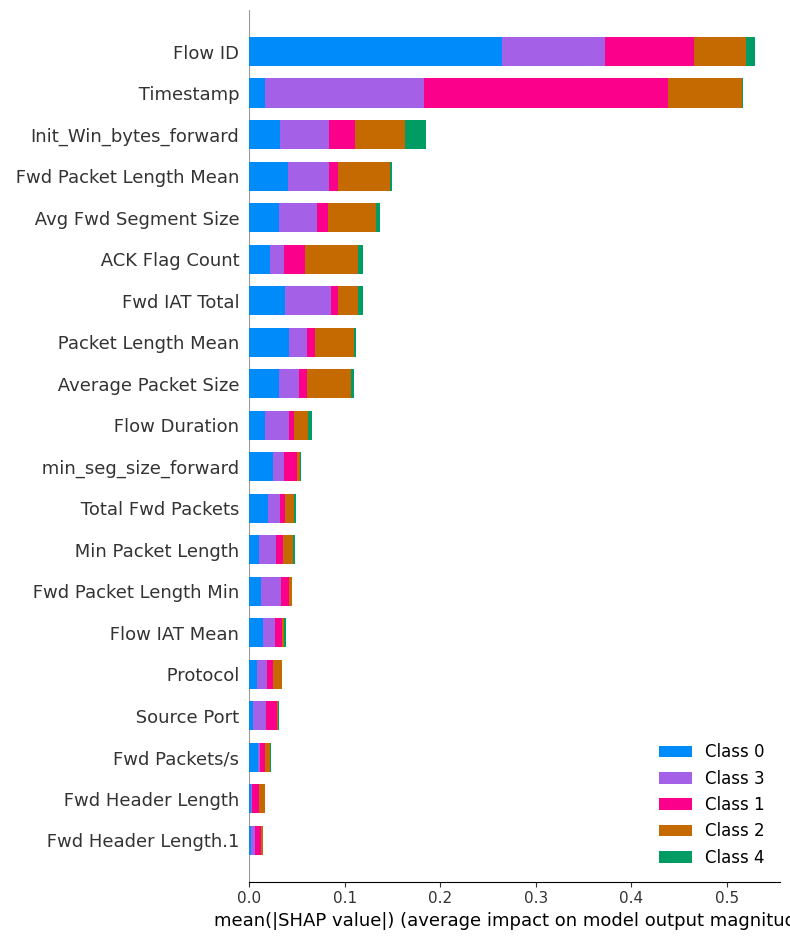

In [ ]:
shap.summary_plot(shap_values, data_new_20features_X.values, plot_type="bar",  feature_names = data_new_20features_X.columns)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


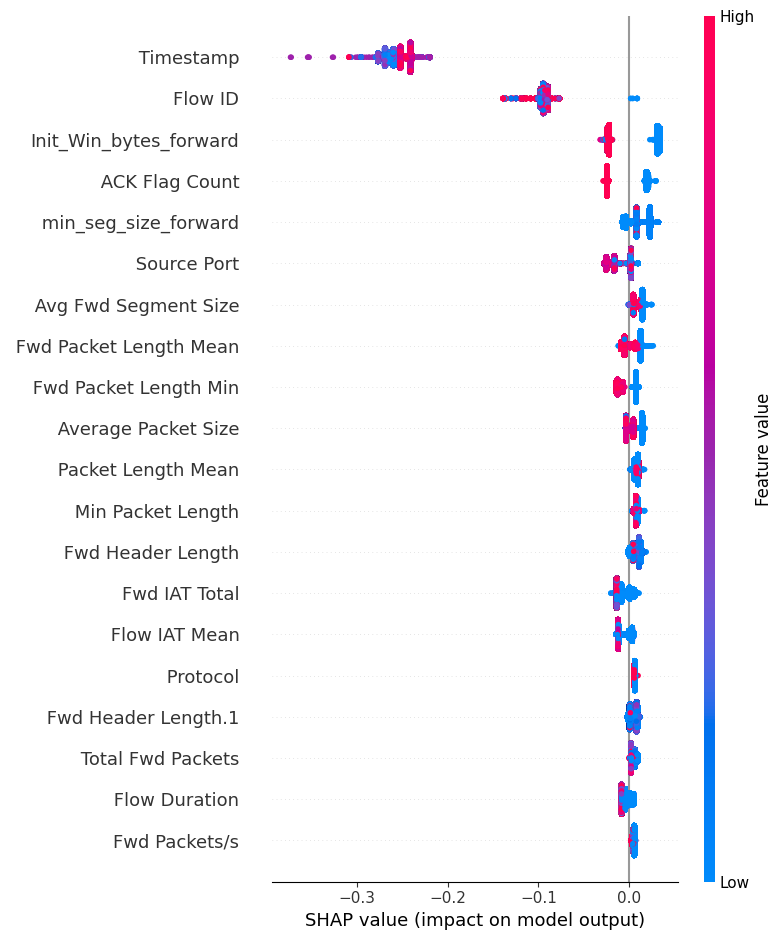

In [ ]:
shap.summary_plot(shap_values[1], data_new_20features_X.values, feature_names = data_new_20features_X.columns)

In [ ]:
acc_score = accuracy_score(y_test_20, rf_y_pred)
print("Accuracy Score for Random_Forest: \n", acc_score*100)

Accuracy Score for Random_Forest: 
 99.64668912115005


In [ ]:
rf.score(X_test_std_20, y_test_20)

0.9964668912115004

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
X = data_X.values
y = data_y.values

In [ ]:
k_folds = KFold(n_splits = 10)

scores = cross_val_score(rf, X, y, cv = k_folds)

In [ ]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.71047606 1.         1.         0.59047189 0.99225668 0.97722143
 0.80134727 1.         0.97999931 0.50946213]
Average CV Score:  0.8561234765096011
Number of CV Scores used in Average:  10


In [ ]:
from keras.utils.np_utils import to_categorical
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

Applying Naiv Vais Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_std_20, y_train_20)
gnb_y_pred = gnb.predict(X_test_std_20)

In [ ]:
print("Classification Report for Naive Bayes: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(gnb_y_pred)))


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Classification Report for Naive Bayes: 
               precision    recall  f1-score   support

      BENIGN       0.08      0.97      0.15      1794
   DrDoS_UDP       0.68      0.95      0.79     39239
         Syn       0.00      0.00      0.00     36493
     UDP-lag       0.43      0.45      0.44     37499
     WebDDoS       0.00      0.00      0.00       171

    accuracy                           0.49    115196
   macro avg       0.24      0.47      0.28    115196
weighted avg       0.37      0.49      0.42    115196



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
gnb_conf_mat = confusion_matrix(y_test_20, gnb_y_pred)
print("Naive Bayes Confusion Matrix: \n", gnb_conf_mat)

Naive Bayes Confusion Matrix: 
 [[ 1746     1     0    47     0]
 [  414 37142     0  1683     0]
 [15319     0     0 21174     0]
 [ 3164 17312     0 17023     0]
 [  132     0     0    39     0]]


Text(33.22222222222222, 0.5, 'Truth')

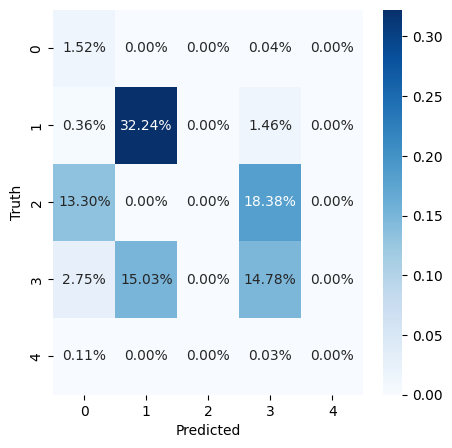

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,5))
sn.heatmap(gnb_conf_mat/np.sum(gnb_conf_mat), annot=True,
            fmt='.2%',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
acc_score_gnb = accuracy_score(y_test_20, gnb_y_pred)
print("Accuracy Score for Naive: \n", acc_score_gnb*100)

Accuracy Score for Naive: 
 48.53553942845238


In [ ]:
k_folds = KFold(n_splits = 10)

scores = cross_val_score(gnb, X, y, cv = k_folds)

In [ ]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.83995972 0.83054967 0.83360533 0.15375534 0.02097295 0.00392375
 0.18507587 0.43529289 0.96697802 0.40445849]
Average CV Score:  0.4674572033751172
Number of CV Scores used in Average:  10


In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
from sklearn import metrics

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
from keras.utils.np_utils import to_categorical
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

X has feature names, but GaussianNB was fitted without feature names


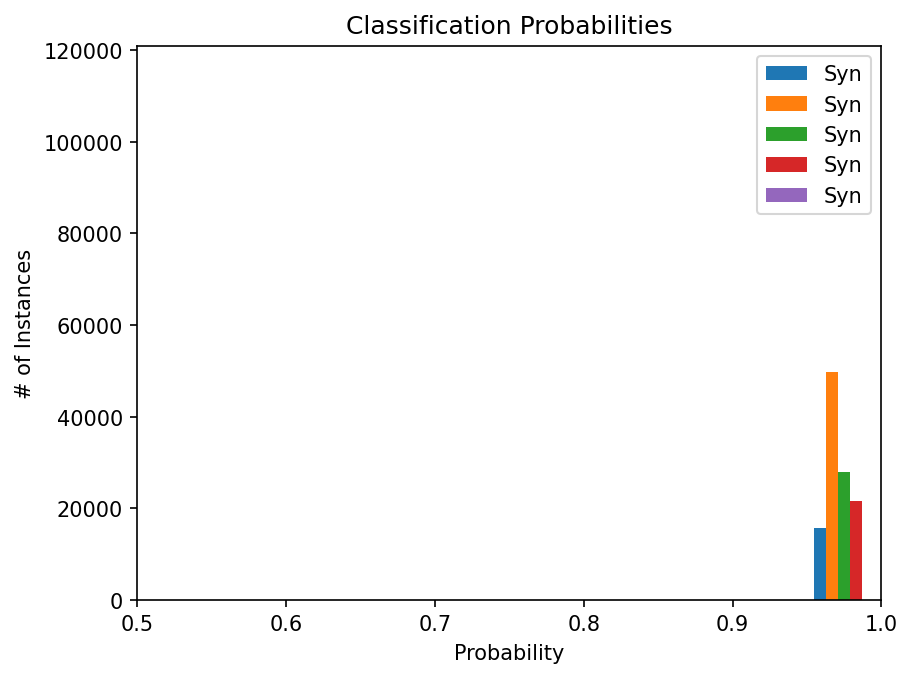

In [ ]:
# get the probability distribution
probas = gnb.predict_proba(X_test_20)
# plot
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.legend(y)
plt.show()

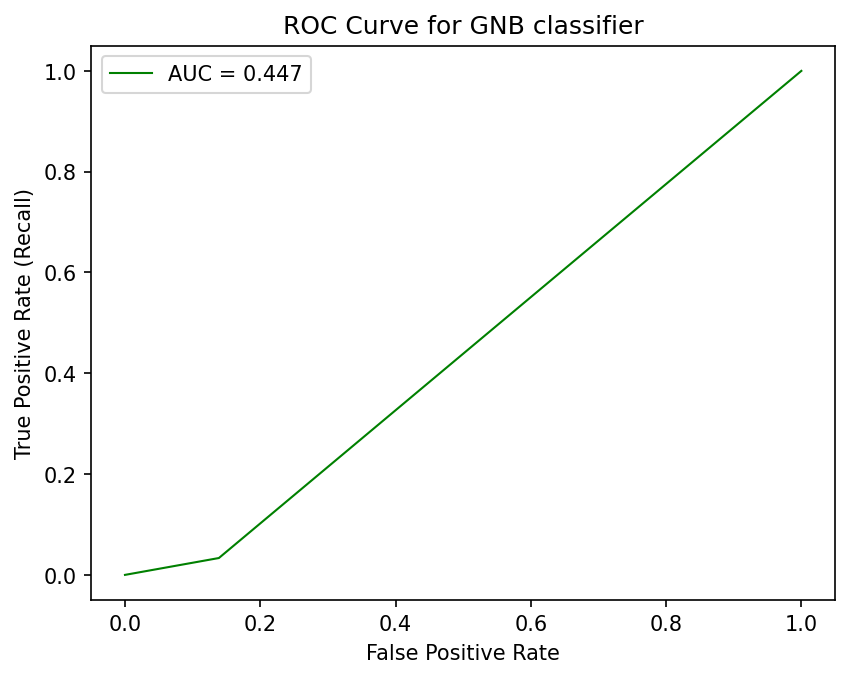

In [ ]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr1, tpr1, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr1, tpr1)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr1, tpr1, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for GNB classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

Reflection Based

In [ ]:
data4 = pd.read_csv('/content/drive/MyDrive/DrDoS_NTP.csv', nrows=batch_size)
data5 = pd.read_csv('/content/drive/MyDrive/DrDoS_DNS.csv', nrows=batch_size)
data6 = pd.read_csv('/content/drive/MyDrive/DrDoS_LDAP.csv',nrows=batch_size)

Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.


In [ ]:
data1 = pd.concat([data4,data5,data6],ignore_index = True)

In [ ]:
data1

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,172.16.0.5-192.168.50.1-60675-80-6,172.16.0.5,60675,192.168.50.1,80,6,2018-12-01 09:17:11.183810,5220876,12,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,205.174.165.72/c.php,1,DrDoS_NTP
1,7,172.16.0.5-192.168.50.1-60676-80-6,172.16.0.5,60676,192.168.50.1,80,6,2018-12-01 09:17:11.205636,12644252,5,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_NTP
2,12858,192.168.50.7-65.55.163.78-50458-443-6,65.55.163.78,443,192.168.50.7,50458,6,2018-12-01 09:17:12.634569,3,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,BENIGN
3,10191,192.168.50.7-65.55.163.78-50465-443-6,65.55.163.78,443,192.168.50.7,50465,6,2018-12-01 09:17:13.458370,3,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,BENIGN
4,239,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-12-01 09:17:13.470913,114329232,52,...,2.466441,15.0,6.0,9527428.0,248706.681286,9950741.0,9092248.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,26444,172.16.0.5-192.168.50.1-834-50223-17,172.16.0.5,834,192.168.50.1,50223,17,2018-12-01 11:23:07.038288,1,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_LDAP
299996,24719,172.16.0.5-192.168.50.1-835-15264-17,172.16.0.5,835,192.168.50.1,15264,17,2018-12-01 11:23:07.038339,1,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_LDAP
299997,28424,172.16.0.5-192.168.50.1-836-7901-17,172.16.0.5,836,192.168.50.1,7901,17,2018-12-01 11:23:07.038452,1,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_LDAP
299998,19748,172.16.0.5-192.168.50.1-837-53832-17,172.16.0.5,837,192.168.50.1,53832,17,2018-12-01 11:23:07.038504,1,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_LDAP


In [ ]:
data1_real = data1.replace(np.inf, np.nan)

In [ ]:
data1_real.isnull().sum().sum()

14800

In [ ]:
data1_df = data1_real.dropna(axis=0)

In [ ]:
data1_df.isnull().sum().sum()

0

In [ ]:
data1_df

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,172.16.0.5-192.168.50.1-60675-80-6,172.16.0.5,60675,192.168.50.1,80,6,2018-12-01 09:17:11.183810,5220876,12,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,205.174.165.72/c.php,1,DrDoS_NTP
1,7,172.16.0.5-192.168.50.1-60676-80-6,172.16.0.5,60676,192.168.50.1,80,6,2018-12-01 09:17:11.205636,12644252,5,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_NTP
2,12858,192.168.50.7-65.55.163.78-50458-443-6,65.55.163.78,443,192.168.50.7,50458,6,2018-12-01 09:17:12.634569,3,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,BENIGN
3,10191,192.168.50.7-65.55.163.78-50465-443-6,65.55.163.78,443,192.168.50.7,50465,6,2018-12-01 09:17:13.458370,3,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,BENIGN
4,239,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-12-01 09:17:13.470913,114329232,52,...,2.466441,15.0,6.0,9527428.0,248706.681286,9950741.0,9092248.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,26444,172.16.0.5-192.168.50.1-834-50223-17,172.16.0.5,834,192.168.50.1,50223,17,2018-12-01 11:23:07.038288,1,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_LDAP
299996,24719,172.16.0.5-192.168.50.1-835-15264-17,172.16.0.5,835,192.168.50.1,15264,17,2018-12-01 11:23:07.038339,1,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_LDAP
299997,28424,172.16.0.5-192.168.50.1-836-7901-17,172.16.0.5,836,192.168.50.1,7901,17,2018-12-01 11:23:07.038452,1,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_LDAP
299998,19748,172.16.0.5-192.168.50.1-837-53832-17,172.16.0.5,837,192.168.50.1,53832,17,2018-12-01 11:23:07.038504,1,2,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,DrDoS_LDAP


In [ ]:
data1_X = data1_df.drop([' Label', 'SimillarHTTP',' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std','Unnamed: 0'], axis = 1)

In [ ]:
data1_X.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count',
       ' SYN Flag Count', ' RST F

In [ ]:
data1_X.shape

(292600, 80)

In [ ]:
data1_y = data1_df[' Label']

In [ ]:
data1_y.shape

(292600,)

In [ ]:
data_df.isnull().sum().sum()

0

In [ ]:
data1_y.unique()

array(['DrDoS_NTP', 'BENIGN', 'DrDoS_DNS', 'DrDoS_LDAP'], dtype=object)

In [ ]:
data1_y

0          DrDoS_NTP
1          DrDoS_NTP
2             BENIGN
3             BENIGN
4             BENIGN
             ...    
299995    DrDoS_LDAP
299996    DrDoS_LDAP
299997    DrDoS_LDAP
299998    DrDoS_LDAP
299999    DrDoS_LDAP
Name:  Label, Length: 292600, dtype: object

Label Encoding for the Dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
data1_y_trans = le.fit_transform(data1_y)

In [ ]:
data1_y_trans

array([3, 3, 0, ..., 2, 2, 2])

In [ ]:
le_fid = LabelEncoder()

In [ ]:
le_fid.fit(data1_X['Flow ID'])
data1_X['Flow ID'] = le_fid.fit_transform(data1_X['Flow ID'])

In [ ]:
le_SIP = LabelEncoder()

In [ ]:
le_SIP.fit(data1_X[' Source IP'])
data1_X[' Source IP'] = le_SIP.fit_transform(data1_X[' Source IP'])

In [ ]:
le_DIP = LabelEncoder()

In [ ]:
le_DIP.fit(data1_X[' Destination IP'])
data1_X[' Destination IP'] = le_DIP.fit_transform(data1_X[' Destination IP'])

In [ ]:
le_timestamp = LabelEncoder()
le_timestamp.fit(data1_X[' Timestamp'])
data1_X[' Timestamp'] = le_timestamp.fit_transform(data1_X[' Timestamp'])

In [ ]:
data1_X

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,75361,27,60675,154,80,6,0,5220876,12,9,...,32,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1
1,75362,27,60676,154,80,6,1,12644252,5,2,...,32,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1
2,272098,332,443,158,50458,6,2,3,2,0,...,20,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1
3,272099,332,443,158,50465,6,3,3,2,0,...,20,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1
4,267633,142,0,205,0,0,4,114329232,52,0,...,0,7.416667,2.466441,15.0,6.0,9527428.0,248706.681286,9950741.0,9092248.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,179720,27,834,154,50223,17,292533,1,2,0,...,20,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1
299996,179823,27,835,154,15264,17,292534,1,2,0,...,20,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1
299997,180268,27,836,154,7901,17,292535,1,2,0,...,20,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1
299998,180453,27,837,154,53832,17,292536,1,2,0,...,20,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1


In [ ]:
data1_X.dtypes

Flow ID                int64
 Source IP             int64
 Source Port           int64
 Destination IP        int64
 Destination Port      int64
                      ...   
Idle Mean            float64
 Idle Std            float64
 Idle Max            float64
 Idle Min            float64
 Inbound               int64
Length: 80, dtype: object

Train-Testing Before feature Selection

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(data1_X, data1_y_trans, test_size = 0.40, random_state = 42)

In [ ]:
X1_train.shape

(175560, 80)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss1 = StandardScaler()
X1_train_std = ss1.fit_transform(X1_train)
X1_test_std = ss1.fit_transform(X1_test)

Feature Selection

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier

#selecting 20 best features
# select_best= SelectKBest(chi2, k=20)
# X_feat_20 = select_best.fit_transform(data_X, data_y_trans)
# X_feat_20.shape

model1 = ExtraTreesClassifier(random_state=42)
model1.fit(data1_X, data1_y_trans)

ExtraTreesClassifier(random_state=42)

In [ ]:
model1.feature_importances_

array([1.01270168e-01, 1.03890116e-02, 3.55964588e-02, 7.02484307e-03,
       7.34330888e-03, 4.84195783e-03, 3.22620603e-01, 2.56807724e-03,
       5.60420028e-03, 5.96741622e-04, 1.32253272e-02, 1.57296288e-04,
       3.16686578e-02, 3.40898132e-02, 3.36759074e-02, 5.58751329e-02,
       1.51719409e-02, 2.21565102e-03, 1.08691270e-03, 1.73298589e-03,
       9.42295321e-03, 2.18267977e-03, 2.06894961e-03, 2.20086605e-03,
       1.97431100e-03, 1.32981977e-02, 2.76661443e-04, 8.81670100e-05,
       5.95134095e-05, 1.22479684e-04, 1.18926379e-04, 8.62762225e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.91479630e-03,
       2.18191224e-04, 1.33112971e-02, 1.05025720e-04, 7.16683610e-02,
       1.04140182e-02, 2.96200887e-02, 2.73250644e-03, 1.27628765e-03,
       0.00000000e+00, 5.27175336e-05, 6.76133872e-04, 0.00000000e+00,
       1.25977597e-03, 3.57236312e-03, 1.85487222e-03, 0.00000000e+00,
       1.49692986e-03, 4.09571685e-02, 2.83821837e-02, 2.72180769e-04,
      

<Axes: title={'center': 'Standardised Dataset Feature Selection using ExtraTreesClassifier'}>

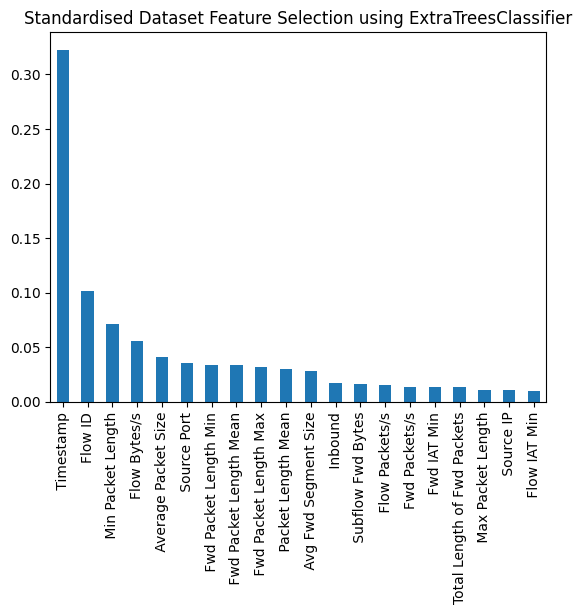

In [ ]:
feature_importance_std = pd.Series(model1.feature_importances_, index=data1_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

In [ ]:
# Create a pandas series with feature importances and sort in descending order
feature_importance_std = pd.Series(model1.feature_importances_, index=data1_X.columns).sort_values(ascending=False)

# Get the top 20 feature names
top_20_features = feature_importance_std[:20].index.tolist()

# Create a new dataset with only the top 20 features
data1_new_20features_X = data1_X[top_20_features]

In [ ]:
data1_new_20features_X

,Timestamp,Flow ID,Min Packet Length,Flow Bytes/s,Average Packet Size,Source Port,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Max,Packet Length Mean,Avg Fwd Segment Size,Inbound,Subflow Fwd Bytes,Flow Packets/s,Fwd Packets/s,Fwd IAT Min,Total Length of Fwd Packets,Max Packet Length,Source IP,Flow IAT Min
0,0,75361,0.0,1.190988e+03,296.095238,60675,0.0,160.666667,509.0,282.636364,160.666667,1,1928,4.022313e+00,2.298465e+00,2.0,1928.0,1073.0,27,2.0
1,1,75362,0.0,0.000000e+00,0.000000,60676,0.0,0.000000,0.0,0.000000,0.000000,1,0,5.536112e-01,3.954366e-01,1.0,0.0,0.0,27,1.0
2,2,272098,0.0,0.000000e+00,0.000000,443,0.0,0.000000,0.0,0.000000,0.000000,1,0,6.666667e+05,6.666667e+05,3.0,0.0,0.0,332,3.0
3,3,272099,0.0,0.000000e+00,0.000000,443,0.0,0.000000,0.0,0.000000,0.000000,1,0,6.666667e+05,6.666667e+05,3.0,0.0,0.0,332,3.0
4,4,267633,0.0,0.000000e+00,0.000000,0,0.0,0.000000,0.0,0.000000,0.000000,0,0,4.548268e-01,4.548268e-01,1.0,0.0,0.0,142,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,292533,179720,1472.0,2.944000e+09,2208.000000,834,1472.0,1472.000000,1472.0,1472.000000,1472.000000,1,2944,2.000000e+06,2.000000e+06,1.0,2944.0,1472.0,27,1.0
299996,292534,179823,1472.0,2.944000e+09,2208.000000,835,1472.0,1472.000000,1472.0,1472.000000,1472.000000,1,2944,2.000000e+06,2.000000e+06,1.0,2944.0,1472.0,27,1.0
299997,292535,180268,1472.0,2.944000e+09,2208.000000,836,1472.0,1472.000000,1472.0,1472.000000,1472.000000,1,2944,2.000000e+06,2.000000e+06,1.0,2944.0,1472.0,27,1.0
299998,292536,180453,1472.0,2.944000e+09,2208.000000,837,1472.0,1472.000000,1472.0,1472.000000,1472.000000,1,2944,2.000000e+06,2.000000e+06,1.0,2944.0,1472.0,27,1.0


Train-Testing After feature selection

In [ ]:
from sklearn.model_selection import train_test_split
X1_train_20, X1_test_20, y1_train_20, y1_test_20 = train_test_split(data1_new_20features_X, data1_y_trans, test_size = 0.30, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss1_20 = StandardScaler()
X1_train_std_20 = ss1_20.fit_transform(X1_train_20)
X1_test_std_20 = ss1_20.fit_transform(X1_test_20)

In [ ]:
X1_train_20

,Timestamp,Flow ID,Min Packet Length,Flow Bytes/s,Average Packet Size,Source Port,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Max,Packet Length Mean,Avg Fwd Segment Size,Inbound,Subflow Fwd Bytes,Flow Packets/s,Fwd Packets/s,Fwd IAT Min,Total Length of Fwd Packets,Max Packet Length,Source IP,Flow IAT Min
108028,107206,92164,440.0,1.274236e+06,442.20,634,440.0,440.00,440.0,440.000000,440.00,1,88000,2.895991e+03,2.895991e+03,1.0,88000.0,440.0,27,1.0
278912,271801,13798,1472.0,2.944000e+09,2208.00,533,1472.0,1472.00,1472.0,1472.000000,1472.00,1,2944,2.000000e+06,2.000000e+06,1.0,2944.0,1472.0,27,1.0
46793,46453,102272,296.0,3.490675e+07,443.04,634,296.0,434.24,440.0,434.352941,434.24,1,21712,8.038585e+04,8.038585e+04,0.0,21712.0,440.0,27,0.0
255525,249249,9555,1472.0,2.944000e+09,2208.00,520,1472.0,1472.00,1472.0,1472.000000,1472.00,1,2944,2.000000e+06,2.000000e+06,1.0,2944.0,1472.0,27,1.0
221551,216146,221102,1472.0,2.944000e+09,2208.00,900,1472.0,1472.00,1472.0,1472.000000,1472.00,1,2944,2.000000e+06,2.000000e+06,1.0,2944.0,1472.0,27,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120783,119818,44771,1472.0,2.944000e+09,2208.00,564,1472.0,1472.00,1472.0,1472.000000,1472.00,1,2944,2.000000e+06,2.000000e+06,1.0,2944.0,1472.0,27,1.0
265722,259116,149553,1472.0,2.944000e+09,2208.00,708,1472.0,1472.00,1472.0,1472.000000,1472.00,1,2944,2.000000e+06,2.000000e+06,1.0,2944.0,1472.0,27,1.0
133355,131870,42934,1472.0,2.944000e+09,2208.00,564,1472.0,1472.00,1472.0,1472.000000,1472.00,1,2944,2.000000e+06,2.000000e+06,1.0,2944.0,1472.0,27,1.0
149281,146805,59894,870.0,1.740000e+09,1305.00,564,870.0,870.00,870.0,870.000000,870.00,1,1740,2.000000e+06,2.000000e+06,1.0,1740.0,870.0,27,1.0


Applying Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf1.fit(X1_train_std_20, y1_train_20)

RandomForestClassifier()

In [ ]:
rf1_y_pred = rf1.predict(X1_test_std_20)

In [ ]:
rf1_y_pred

array([1, 2, 2, ..., 3, 3, 3])

In [ ]:
print("Classification Report for Random Forest: \n", classification_report(le.inverse_transform(y1_test_20), le.inverse_transform(rf1_y_pred)))

Classification Report for Random Forest: 
               precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      4268
   DrDoS_DNS       1.00      1.00      1.00     28225
  DrDoS_LDAP       1.00      1.00      1.00     29373
   DrDoS_NTP       1.00      1.00      1.00     25914

    accuracy                           1.00     87780
   macro avg       1.00      1.00      1.00     87780
weighted avg       1.00      1.00      1.00     87780



In [ ]:
rf1_conf_mat = confusion_matrix(y1_test_20, rf1_y_pred)
print("Random Forest Confusion: \n", rf1_conf_mat)

Random Forest Confusion: 
 [[ 4268     0     0     0]
 [    0 28111     0   114]
 [    0   105 29268     0]
 [    0     0     0 25914]]


Text(33.22222222222222, 0.5, 'Truth')

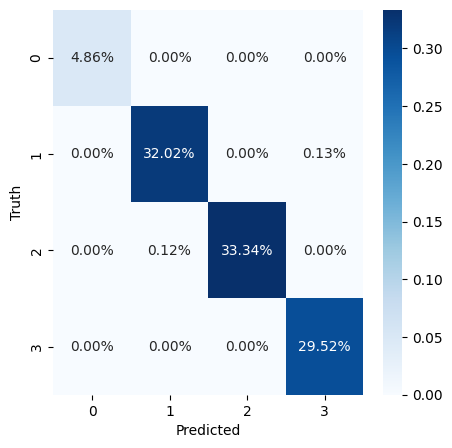

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,5))
sn.heatmap(rf1_conf_mat/np.sum(rf1_conf_mat), annot=True,
            fmt='.2%',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
explainer1 = shap.TreeExplainer(rf1)
shap_values1 = explainer1.shap_values(data1_new_20features_X)

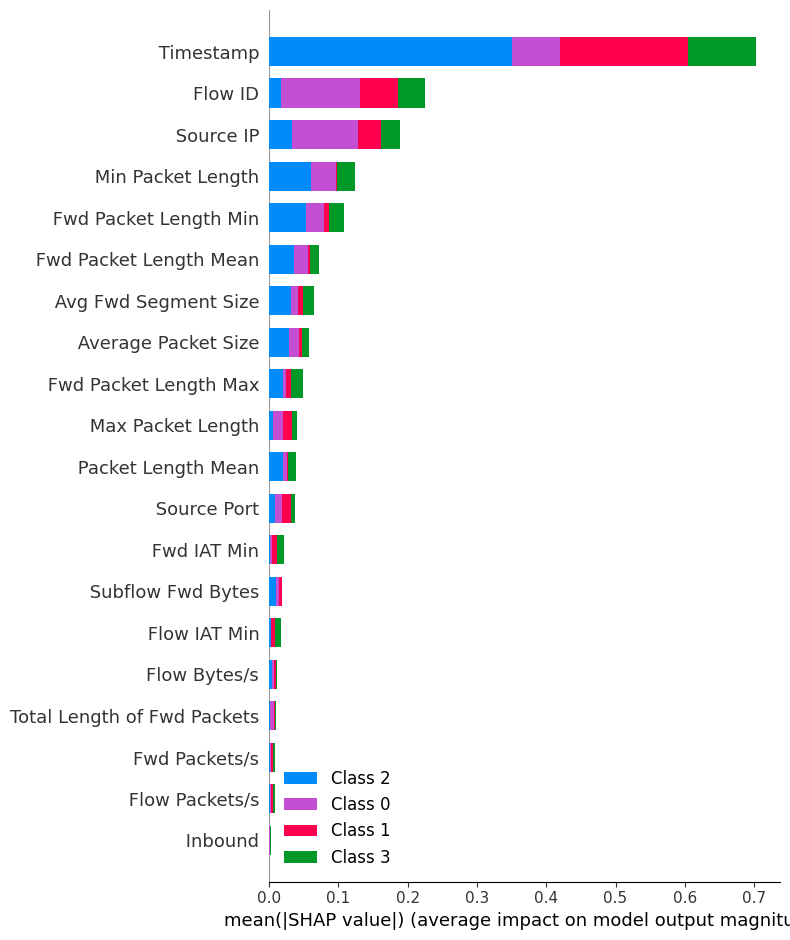

In [ ]:
shap.summary_plot(shap_values1, data1_new_20features_X.values, plot_type="bar",  feature_names = data1_new_20features_X.columns)

In [ ]:
acc1_score = accuracy_score(y1_test_20, rf1_y_pred)
print("Accuracy Score for Random_Forest: \n", acc1_score*100)

Accuracy Score for Random_Forest: 
 99.75051264524949


In [ ]:
X1 = data1_X.values
y1 = data1_y.values

In [ ]:
k_folds = KFold(n_splits = 10)

scores = cross_val_score(rf, X1, y1, cv = k_folds)

In [ ]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.89429255 0.99996582 1.         0.62347915 1.         1.
 0.85249487 0.99972659 0.99979494 0.99958988]
Average CV Score:  0.9369343814080657
Number of CV Scores used in Average:  10


In [ ]:
X1_train_std_20

array([[-0.46090338, -0.5729459 , -0.96585916, ..., -0.95237935,
        -0.2248051 , -0.01136325],
       [ 1.48766875, -1.54898168,  0.82981449, ...,  0.68554401,
        -0.2248051 , -0.01136325],
       [-1.18013301, -0.4470524 , -1.21641827, ..., -0.95237935,
        -0.2248051 , -0.01136712],
       ...,
       [-0.16891648, -1.18609754,  0.82981449, ...,  0.68554401,
        -0.2248051 , -0.01136325],
       [ 0.00789281, -0.9748635 , -0.2176618 , ..., -0.26991128,
        -0.2248051 , -0.01136325],
       [-0.2869827 , -1.3752367 ,  0.82981449, ...,  0.68554401,
        -0.2248051 , -0.01136325]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier()
dt1.fit(X1_train_std_20, y1_train_20)

DecisionTreeClassifier()

In [ ]:
dt1.predict(X1_test_std_20)

array([1, 2, 2, ..., 3, 3, 3])

In [ ]:
dt1_y_pred = dt1.predict(X1_test_std_20)

In [ ]:
print("Classification Report for Decision Tree: \n", classification_report(le.inverse_transform(y1_test_20), le.inverse_transform(dt1_y_pred)))


Classification Report for Decision Tree: 
               precision    recall  f1-score   support

      BENIGN       0.96      0.92      0.94      4268
   DrDoS_DNS       0.99      0.99      0.99     28225
  DrDoS_LDAP       1.00      1.00      1.00     29373
   DrDoS_NTP       0.99      1.00      0.99     25914

    accuracy                           0.99     87780
   macro avg       0.99      0.98      0.98     87780
weighted avg       0.99      0.99      0.99     87780



In [ ]:
dt1_conf_mat = confusion_matrix(y1_test_20, dt1_y_pred)
print("Decision Tree Confusion: \n", dt1_conf_mat)

Decision Tree Confusion: 
 [[ 3940    83     5   240]
 [   74 28037     0   114]
 [    0   105 29268     0]
 [   83     0     0 25831]]


Text(33.22222222222222, 0.5, 'Truth')

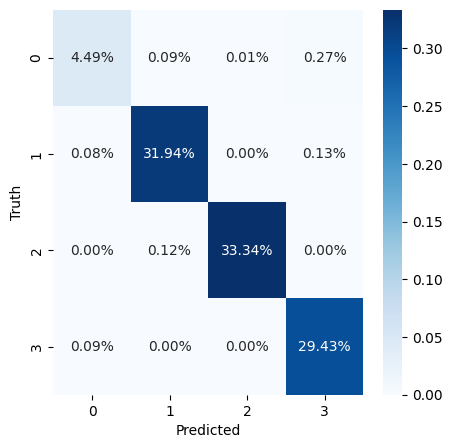

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,5))
sn.heatmap(dt1_conf_mat/np.sum(dt1_conf_mat), annot=True,
            fmt='.2%',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
explainer2 = shap.TreeExplainer(dt1)
shap_values2 = explainer2.shap_values(data1_new_20features_X)

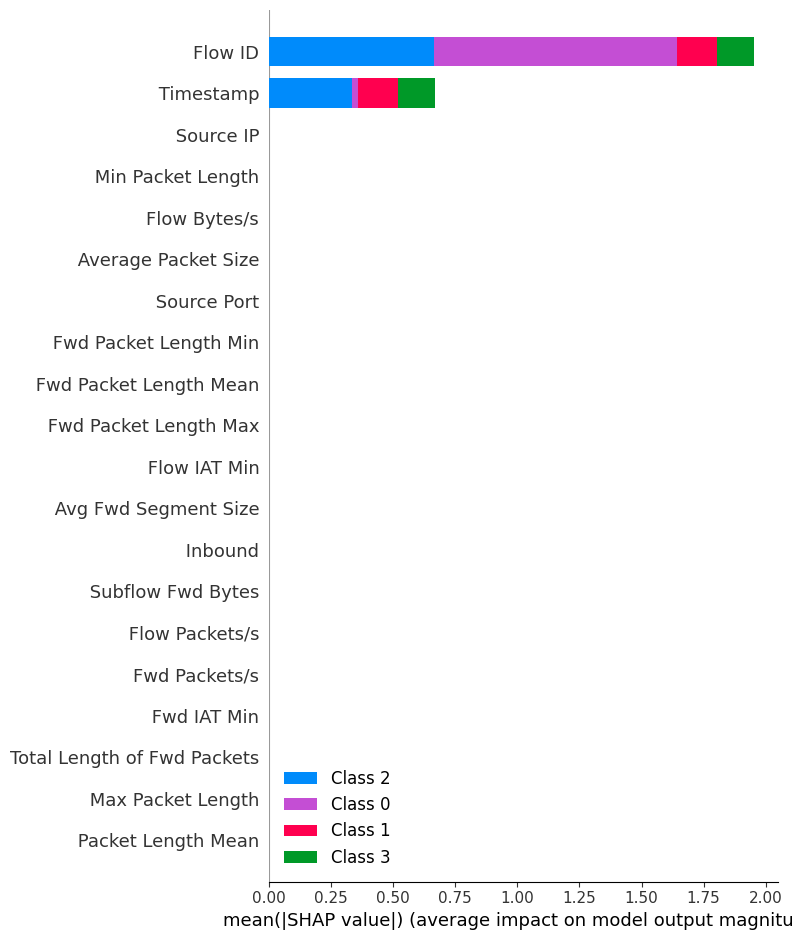

In [ ]:
shap.summary_plot(shap_values2, data1_new_20features_X.values, plot_type="bar",  feature_names = data1_new_20features_X.columns)

In [ ]:
acc_score_dt = accuracy_score(y1_test_20, dt1_y_pred)
print("Accuracy Score for Decision Tree: \n", acc_score_dt*100)

Accuracy Score for Decision Tree: 
 99.19799498746868


In [ ]:
k_folds = KFold(n_splits = 10)

scores = cross_val_score(dt1, X1, y1, cv = k_folds)

In [ ]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.99032809 1.         0.99996582 0.9038961  1.         1.
 0.83215995 1.         1.         0.99972659]
Average CV Score:  0.9726076555023923
Number of CV Scores used in Average:  10


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gradinet_boost1 = GradientBoostingClassifier()
gradinet_boost1.fit(X1_train_std_20, y1_train_20)

GradientBoostingClassifier()

In [ ]:
gradinet_boost1.predict(X1_test_std_20)

array([1, 2, 2, ..., 3, 3, 3])

In [ ]:
gradinet_boost1_y_pred = gradinet_boost1.predict(X1_test_std_20)

In [ ]:
y1_pred_xgboost = gradinet_boost1.predict(X1_test_std_20)

In [ ]:
print("Classification Report for Gradinet Boost: \n", classification_report(le.inverse_transform(y1_test_20), le.inverse_transform(gradinet_boost1_y_pred)))

Classification Report for Gradinet Boost: 
               precision    recall  f1-score   support

      BENIGN       0.94      0.92      0.93      4268
   DrDoS_DNS       0.99      0.99      0.99     28225
  DrDoS_LDAP       1.00      0.99      1.00     29373
   DrDoS_NTP       0.99      1.00      0.99     25914

    accuracy                           0.99     87780
   macro avg       0.98      0.98      0.98     87780
weighted avg       0.99      0.99      0.99     87780



In [ ]:
gradinet_boost1_conf_mat = confusion_matrix(y1_test_20, gradinet_boost1_y_pred)
print("Gradinet Boost Confusion: \n", gradinet_boost1_conf_mat)

Gradinet Boost Confusion: 
 [[ 3940    85     3   240]
 [   75 28036     0   114]
 [  108   106 29159     0]
 [   83     0     0 25831]]


Text(33.22222222222222, 0.5, 'Truth')

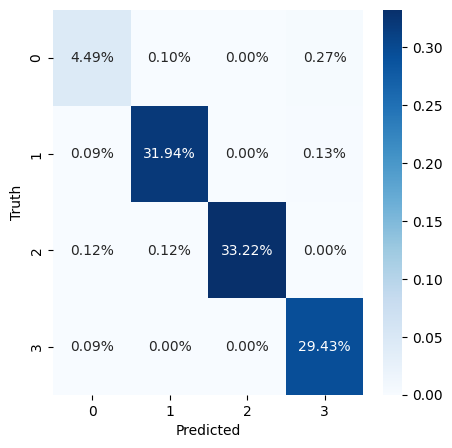

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,5))
sn.heatmap(gradinet_boost1_conf_mat/np.sum(gradinet_boost1_conf_mat), annot=True,
            fmt='.2%',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y1_pred_xgboost

array([1, 2, 2, ..., 3, 3, 3])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc_score_xgboost = accuracy_score(y1_test_20, y1_pred_xgboost)
print("Accuracy Score for XGBoost Classifier: \n", acc_score_xgboost*100)

Accuracy Score for XGBoost Classifier: 
 99.07268170426066


In [ ]:
k_folds = KFold(n_splits = 10)

scores = cross_val_score(gradinet_boost1, X1, y1, cv = k_folds)

In [ ]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.99958988 1.         0.99996582 0.90546822 1.         1.
 0.83215995 1.         1.         0.99976077]
Average CV Score:  0.9736944634313055
Number of CV Scores used in Average:  10


# New Section